In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
dataset = pd.read_csv("housing.csv")

In [20]:
print(dataset.head(5))

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [19]:
dataset.shape

(20640, 10)

In [92]:
# Identifying the type of values present in dataset :: int , float , object(string)
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 1
Integer variables: 0
Float variables: 9


<Axes: >

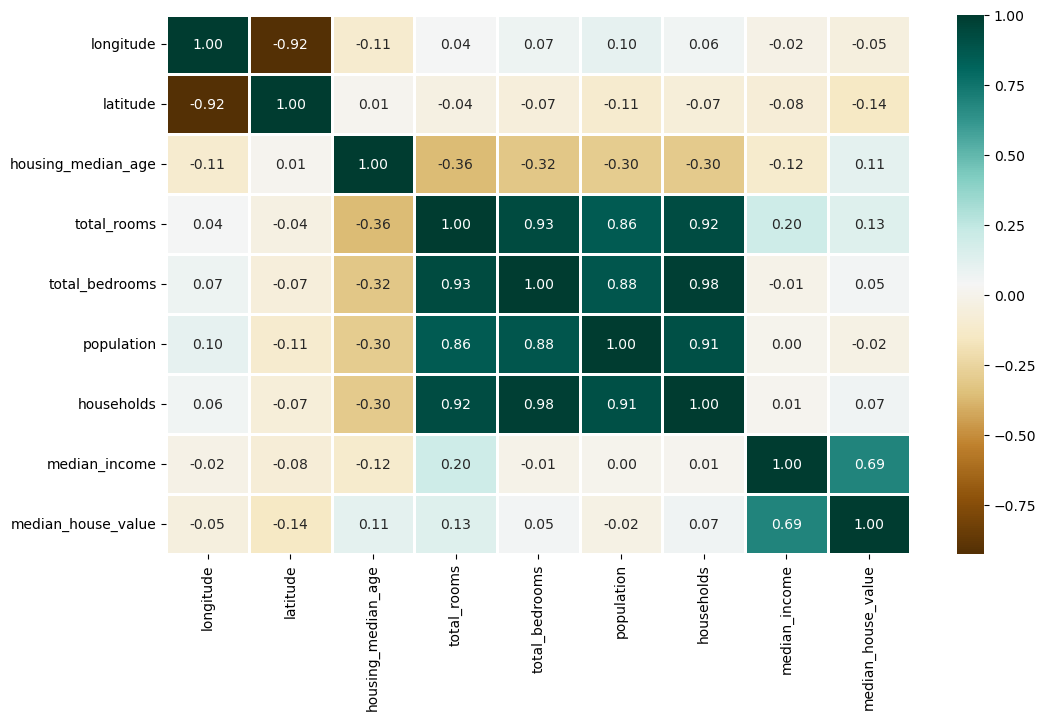

In [94]:
# EDA :: deep analysis of data to discover different patterns and spot anomalies , Analysed numerical values
numerical_dataset = dataset.select_dtypes(include=['number'])
plt.figure(figsize=(12 , 7))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

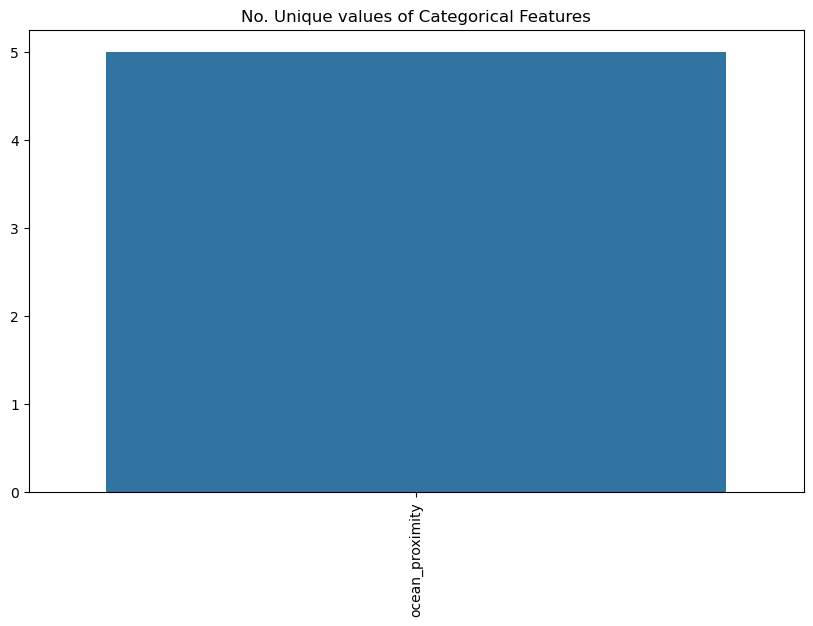

In [95]:
# Analysed the categorical features
unique_values = []
for col in object_cols:
  unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

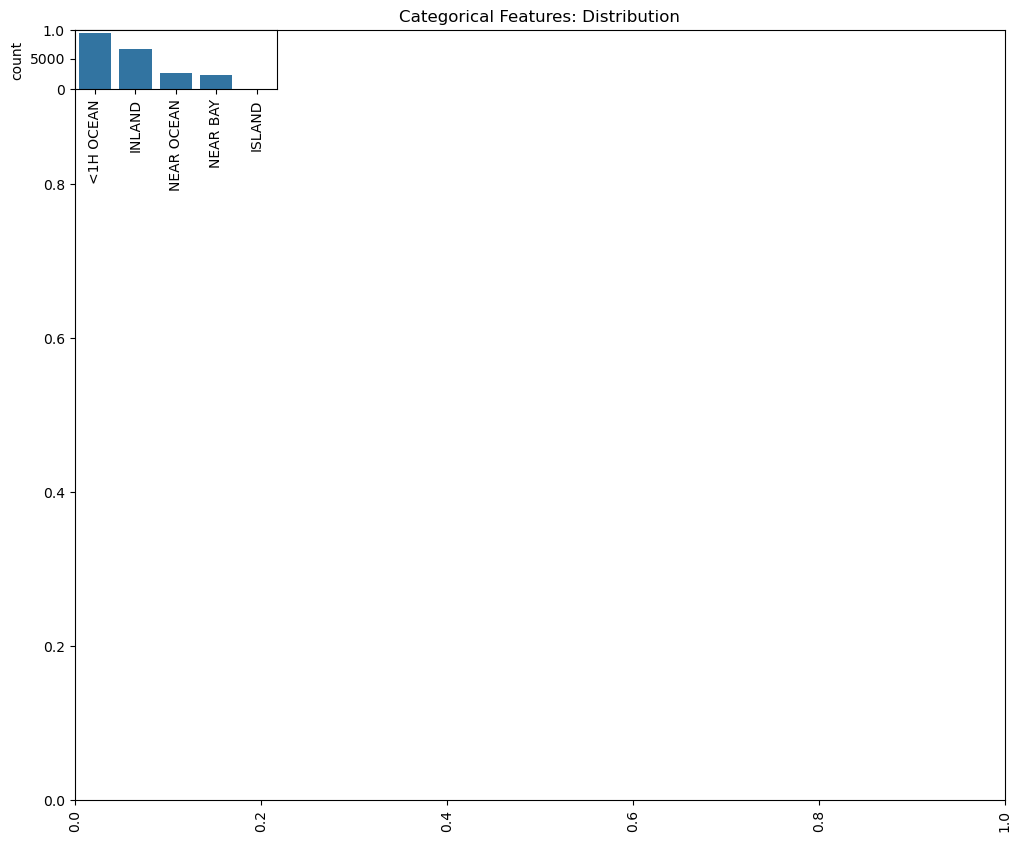

In [96]:
# Explicitly analysing each value from the feature
plt.figure(figsize=(12, 10))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
    y = dataset[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

In [35]:
print(dataset.head(5))

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [103]:
# Data - cleaning
# filling the null values with mean
dataset['median_house_value'] = dataset['median_house_value'].fillna(dataset['median_house_value'].mean())
dataset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [102]:
# took a new dataset, excluding null values from the original dataset
new_dataset = dataset.dropna()

In [105]:
# no null values is new dataset
new_dataset.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [106]:
# we need to encode the categorical data into binary vectors :: this maps the values to integer values
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
      len(object_cols))

Categorical variables:
['ocean_proximity']
No. of. categorical features:  1


In [44]:
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

In [107]:
# splitting dataset into training and testing
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['median_house_value'], axis=1)
Y = df_final['median_house_value']

X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [108]:
# Linear Regression -- model training
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

# model train
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)

#predictions
Y_pred = model_LR.predict(X_valid)

#model evaluation
# mse = mean_squared_error(Y_valid , Y_pred)
r2 = r2_score(Y_valid  , Y_pred)

print("Mean absolute % Error: ", mean_absolute_percentage_error(Y_valid, Y_pred))
print("R2 Score: ", r2)

Mean absolute % Error:  0.28641935192166434
R2 Score:  0.6526096664531114


In [111]:
# since, the dimensions of x_valid ,y_valid are not same:: so they can't be plotted using simple linear regression 
# X_valid has 13 attributes :: to plot need to select any one feature , then plot
print(X_valid.shape)
print(Y_valid.shape)
print(Y_pred.shape)

(4087, 13)
(4087,)
(4087,)


In [112]:
print(dataset.head(5))

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [113]:
# selected median income as a feature to plot
X1_valid = X_valid.iloc[:,7]

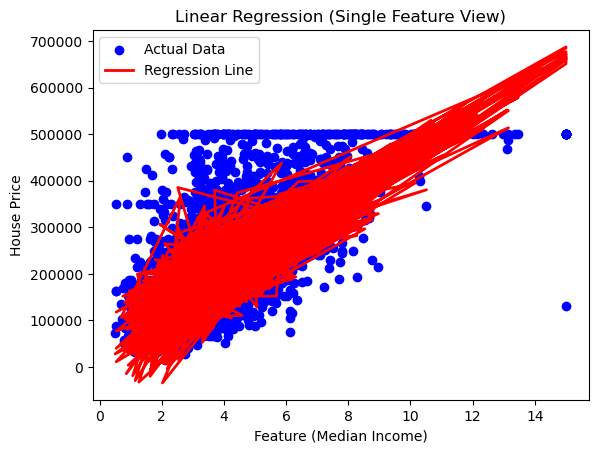

In [114]:
plt.scatter(X1_valid, Y_valid, color="blue", label="Actual Data")

plt.plot(
    X1_valid,
    model_LR.predict(X_valid),
    color="red",
    linewidth=2,
    label="Regression Line"
)

plt.xlabel("Feature (Median Income)")
plt.ylabel("House Price")
plt.title("Linear Regression (Single Feature View)")
plt.legend()
plt.show()